# 피봇이란?
* 기존에 있던 열을 참고로 하여 기존의 데이터를 활용하여 새로운 index, column으로 데이터를 재해석하는 기법

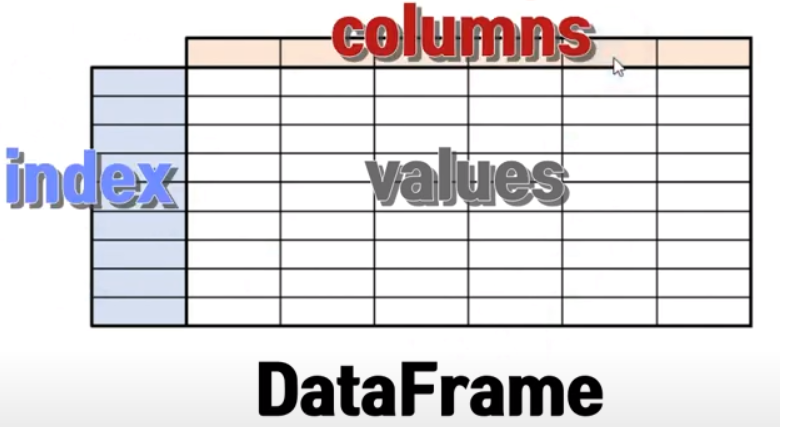

* 분석하고자 하는 데이터 => values
* 기존에 있던 열 => index, columns 으로 변환

In [2]:
import pandas as pd

In [3]:
a1 = ['송중기', '이유빈', '권보아', '차유람', '박보검', '김범수',  '이효리', '유승호', '김유정']
a2 = list("남여여여남남여남여")
a3 = list("AAABBBCCC")
a4 = [97, 88, 78, 64, 84, 89, 87, 92, 99]
a5 = [i + "등" for i in list("123321321")]
a6 = [i + "시" for i in list("수정정수수수정정수")]


data = {
    '이름': a1,
    '성별': a2,
    '반': a3,
    '점수': a4,
    '반등수': a5,
    '비고': a6
}

df = pd.DataFrame(data)
df

,이름,성별,반,점수,반등수,비고
0,송중기,남,A,97,1등,수시
1,이유빈,여,A,88,2등,정시
2,권보아,여,A,78,3등,정시
3,차유람,여,B,64,3등,수시
4,박보검,남,B,84,2등,수시
5,김범수,남,B,89,1등,수시
6,이효리,여,C,87,3등,정시
7,유승호,남,C,92,2등,정시
8,김유정,여,C,99,1등,수시


# 집계 없는 Pivot 테이블  
중복되는 데이터가 없을 경우 적용

## pivot 메소드 문법
* df.pivot(values=[분석하고자하는 데이터열], index=[기존열1], columns=[기존열2])

## 예) 반별 등수별 이름

In [4]:
df.pivot(index='반', columns='반등수', values='이름')

반등수,1등,2등,3등
반,,,
A,송중기,이유빈,권보아
B,김범수,박보검,차유람
C,김유정,유승호,이효리


In [5]:
df.columns

Index(['이름', '성별', '반', '점수', '반등수', '비고'], dtype='object')

* 문제 풀어보세요  
  반별 등수별 점수

In [6]:
df.pivot(index='반', columns='반등수', values='점수')

반등수,1등,2등,3등
반,,,
A,97,88,78
B,89,84,64
C,99,92,87


In [7]:
df.pivot(index='반등수', columns='반', values='점수')

반,A,B,C
반등수,,,
1등,97,89,99
2등,88,84,92
3등,78,64,87


* 정의되지 않은 값에 대한 Pivot 결과

In [8]:
a1 = ['송중기', '이유빈', '권보아', '차유람', '박보검', '김범수',  '이효리', '유승호', '김유정','노가현']
a2 = list("남여여여남남여남여여")
a3 = list("AAABBBCCCC")
a4 = [97, 88, 78, 64, 84, 89, 87, 92, 99,60]
a5 = [i + "등" for i in list("1233213214")]
a6 = [i + "시" for i in list("수정정수수수정정수정")]


data = {
    '이름': a1,
    '성별': a2,
    '반': a3,
    '점수': a4,
    '반등수': a5,
    '비고': a6
}

df = pd.DataFrame(data)
df

,이름,성별,반,점수,반등수,비고
0,송중기,남,A,97,1등,수시
1,이유빈,여,A,88,2등,정시
2,권보아,여,A,78,3등,정시
3,차유람,여,B,64,3등,수시
4,박보검,남,B,84,2등,수시
5,김범수,남,B,89,1등,수시
6,이효리,여,C,87,3등,정시
7,유승호,남,C,92,2등,정시
8,김유정,여,C,99,1등,수시
9,노가현,여,C,60,4등,정시


In [9]:
df.pivot(index='반', columns='반등수', values='점수')

반등수,1등,2등,3등,4등
반,,,,
A,97.0,88.0,78.0,NaN
B,89.0,84.0,64.0,NaN
C,99.0,92.0,87.0,60.0


* 정의되지 않은 값에 대한 Pivot 테이블 결과 표시  
행렬로 매치했을때 값이 없다면 NaN으로 표기  
아래예) 반별 등수별 점수

# 집계 기능을 추가한 Pivot 테이블

* 집계: 수치형(숫자) 데이터를 기준으로 기본 통계 항목을 계산 하는 행위 (mean, sum, min, max ...)

## pivot_table 함수 문법
* df.pivot_table(values=[분석하고자하는 데이터열], index=[기존열1], columns=[기존열2], aggfunc=집계함수)  
  분석하고자 하는 데이터열이 수치형 데이터이어야 한다.
* aggfunc인자의 기본값은 mean 따라서 생략하면 mean으로 동작

In [10]:
a1 = ['송중기', '이유빈', '권보아', '차유람', '박보검', '김범수',  '이효리', '유승호', '김유정']
a2 = list("남여여여남남여남여")
a3 = list("AAABBBCCC")
a4 = [97, 88, 78, 64, 84, 89, 87, 92, 99]
a5 = [i + "등" for i in list("123321321")]
a6 = [i + "시" for i in list("수정정수수수정정수")]


data = {
    '이름': a1,
    '성별': a2,
    '반': a3,
    '점수': a4,
    '반등수': a5,
    '비고': a6
}

df = pd.DataFrame(data)
df

,이름,성별,반,점수,반등수,비고
0,송중기,남,A,97,1등,수시
1,이유빈,여,A,88,2등,정시
2,권보아,여,A,78,3등,정시
3,차유람,여,B,64,3등,수시
4,박보검,남,B,84,2등,수시
5,김범수,남,B,89,1등,수시
6,이효리,여,C,87,3등,정시
7,유승호,남,C,92,2등,정시
8,김유정,여,C,99,1등,수시


* 반별 등수별 점수

### 기본 옵션으로 적용시

In [11]:
df.pivot_table(index='반', columns='반등수', values='점수')

반등수,1등,2등,3등
반,,,
A,97.0,88.0,78.0
B,89.0,84.0,64.0
C,99.0,92.0,87.0


* 위 결과는 반별 등수별 점수 => 각각 1등, 2등, 3등이 1명씩 존재하기 때문에 평균값으로 계산해도 기본 pivot 함수의 결과와 동일.

# 중복 데이터가 있을 때

In [12]:
# 중복 데이터가 섞인 판매 기록
data = {
    "날짜": [
        "2023-01-01", "2023-01-01", "2023-01-01", 
        "2023-01-02", "2023-01-02", 
        "2023-01-03", "2023-01-03", "2023-01-03", "2023-01-03"
    ],
    "도시": [
        "서울", "서울", "부산", 
        "서울", "부산", 
        "서울", "서울", "부산", "부산"
    ],
    "판매량": [100, 150, 200, 120, 90, 130, 170, 80, 95]
}

df = pd.DataFrame(data)
df

,날짜,도시,판매량
0,2023-01-01,서울,100
1,2023-01-01,서울,150
2,2023-01-01,부산,200
3,2023-01-02,서울,120
4,2023-01-02,부산,90
5,2023-01-03,서울,130
6,2023-01-03,서울,170
7,2023-01-03,부산,80
8,2023-01-03,부산,95


* 합계 집계

In [13]:
df.pivot_table(index='날짜', columns='도시', values='판매량', aggfunc='sum')

도시,부산,서울
날짜,,
2023-01-01,200,250
2023-01-02,90,120
2023-01-03,175,300


* 평균집계

In [14]:
df.pivot_table(index='날짜', columns='도시', values='판매량', aggfunc='mean')

도시,부산,서울
날짜,,
2023-01-01,200.0,125.0
2023-01-02,90.0,120.0
2023-01-03,87.5,150.0


In [17]:
df.pivot_table(index='날짜', columns='도시', values='판매량', aggfunc='max')

도시,부산,서울
날짜,,
2023-01-01,200,150
2023-01-02,90,120
2023-01-03,95,170


In [18]:
df.pivot_table(index='날짜', columns='도시', values='판매량', aggfunc='min')

도시,부산,서울
날짜,,
2023-01-01,200,100
2023-01-02,90,120
2023-01-03,80,130


In [19]:
df.pivot_table(index='날짜', columns='도시', values='판매량', aggfunc='count')

도시,부산,서울
날짜,,
2023-01-01,1,2
2023-01-02,1,1
2023-01-03,2,2


## 중간정리

* pivot 메소드는 pivot 테이블로 구성하는 값이 각각 행렬에 유일한 값으로 매치가 되어야 한다.  
    * 실무 데이터에서는 이러한 데이터 규격에 맞는 데이터보다는 중복되는 데이터가 더 일반적이다.
* pivot_table 메소드는 pivot 테이블로 구성하는 값이 수치형 데이터를 기준으로 group by한 결과 값에 대하여 집계함수를 적용한다.  
    * 실무 데이터에서 이러한 데이터는 일반적이다.   

따라서 처음 분석할 때에는 pivot_table 함수 위주로 분석을 하자!

In [20]:
data = {
    '지역': ['서울', '서울', '서울', '서울', '부산', '부산', '부산', '부산','부산'],
    '연도': [2019, 2019, 2020, 2020, 2019, 2019, 2020, 2020,2020],
    '월': ['1월', '2월', '1월', '2월', '1월', '2월', '1월', '2월', '2월'],
    '판매량': [100, 150, 200, 250, 120, 180, 220, 260, 100]
}
df = pd.DataFrame(data)
df

,지역,연도,월,판매량
0,서울,2019,1월,100
1,서울,2019,2월,150
2,서울,2020,1월,200
3,서울,2020,2월,250
4,부산,2019,1월,120
5,부산,2019,2월,180
6,부산,2020,1월,220
7,부산,2020,2월,260
8,부산,2020,2월,100


* 지역별 연도별 판매 누적량

In [23]:
df.pivot_table(index='지역', columns='연도', values='판매량', aggfunc='sum')

연도,2019,2020
지역,,
부산,300,580
서울,250,450


* 지역별 연도별 평균 판매량

In [ ]:
df.pivot_table(index='지역', columns='연도', values='판매량', aggfunc='mean')

* 지역별 연도별 최대 판매량

In [24]:
df.pivot_table(index='지역', columns='연도', values='판매량', aggfunc='max')

연도,2019,2020
지역,,
부산,180,260
서울,150,250


* 관점의 확장
    * 2가지 관점에서 3가지 이상으로 확장(A별 B별 C별 XX)  
     예) 지역별 연도별 월별 누적판매량

In [25]:
df.columns

Index(['지역', '연도', '월', '판매량'], dtype='object')

* 멀티인덱스로 행에서 2가지 관점을 표현

In [45]:
pv_table = df.pivot_table(index=['지역','연도'], columns='월', values='판매량', aggfunc='sum')
pv_table

월         1월   2월
지역 연도            
부산 2019  120  180
   2020  220  360
서울 2019  100  150
   2020  200  250

In [46]:
pv_table.loc['부산']

월,1월,2월
연도,,
2019,120,180
2020,220,360


In [47]:
pv_table.index

MultiIndex([('부산', 2019),
            ('부산', 2020),
            ('서울', 2019),
            ('서울', 2020)],
           names=['지역', '연도'])

In [52]:
pv_table

월         1월   2월
지역 연도            
부산 2019  120  180
   2020  220  360
서울 2019  100  150
   2020  200  250

In [51]:
pv_table.loc[[('부산', 2019)]]

,월,1월,2월
지역,연도,,
부산,2019,120,180


2019년 열 데이터 조회

* 멀티인덱스로 열에서 2가지 관점을 표현

In [29]:
pv_table = df.pivot_table(index='지역', columns=['연도', '월'], values='판매량', aggfunc='sum')
pv_table

연도 2019      2020     
월    1월   2월   1월   2월
지역                    
부산  120  180  220  360
서울  100  150  200  250

* 지역별 연도별 월 별 판매량 분석 데이터에서 각 지역별 데이터 조회

In [31]:
pv_table.loc[['부산']]

연도 2019      2020     
월    1월   2월   1월   2월
지역                    
부산  120  180  220  360

In [32]:
pv_table.loc[['서울']]

연도 2019      2020     
월    1월   2월   1월   2월
지역                    
서울  100  150  200  250

In [33]:
pv_table.columns

MultiIndex([(2019, '1월'),
            (2019, '2월'),
            (2020, '1월'),
            (2020, '2월')],
           names=['연도', '월'])

* 멀티인덱스 열 접근

2019년 열 데이터 조회

In [34]:
pv_table[2019]

월,1월,2월
지역,,
부산,120,180
서울,100,150


2020년 열 데이터 조회

In [35]:
pv_table[2020]

월,1월,2월
지역,,
부산,220,360
서울,200,250


In [36]:
pv_table.columns

MultiIndex([(2019, '1월'),
            (2019, '2월'),
            (2020, '1월'),
            (2020, '2월')],
           names=['연도', '월'])

In [38]:
pv_table[[(2019, '1월')]]

연도,2019
월,1월
지역,
부산,120
서울,100


---

# Groupby
* 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도의 데이터처리(집계함수)를 수행

## Groupby를 위한 빅데이터 생성

### 가상의 데이터 시뮬레이션 하기 위한 기초 기술

* randint 및 random seed 값의 의미  
random.randint(시작범위값,끝범위값) : 시작범위값~ 끝범위값 중의 임의의 값을 생성 (균등분포 방식)  
주의사항] 시작범위값, 끝범위값이 모두 포함된다.  
random seed 값은 random 하게 발생되는 순서를 보장하게 하는 값

In [53]:
import random

In [63]:
random.randint(1,6)

1

* 문자열 데이터를 랜덤하게 생성하는 기법  
예) 아래 판매처를 랜덤하게 생성하고 싶다면?  
'이마트', '홈플러스', '코스트코', '롯데마트', '이마트트레이더스'

In [64]:
store_name = ['이마트', '홈플러스', '코스트코', '롯데마트', '이마트트레이더스']

In [88]:
random.seed(1) # 랜덤 시드 (무작위로 발생하는 순서를 보장)
random.choices(store_name, k=10)

['이마트',
 '이마트트레이더스',
 '롯데마트',
 '홈플러스',
 '코스트코',
 '코스트코',
 '롯데마트',
 '롯데마트',
 '이마트',
 '이마트']

In [94]:
random.seed(1) # 랜덤 시드 (무작위로 발생하는 순서를 보장)
# DATA_LIMIT = 1_000_000
DATA_LIMIT = 50

# 판매처
store_name = ['이마트', '홈플러스', '코스트코', '롯데마트', '이마트트레이더스']
# 상품
products = ['셔츠', 'TV', '의자', '가방', '과자', '바지', '노트북', '소파', '신발', '음료']
# 판매량
sales_volume = [ random.randint(10, 100) for _ in range(DATA_LIMIT) ]
# 판매누적액
sales_price = [ random.randint(50_000, 500_000) for _ in range(DATA_LIMIT) ]

data ={
    '판매처': random.choices(store_name, k=DATA_LIMIT),
    '상품': random.choices(products, k=DATA_LIMIT),
    '판매량': sales_volume,
    '판매누적액': sales_price
}
df = pd.DataFrame(data)
df.head(50)


,판매처,상품,판매량,판매누적액
0,이마트,바지,27,489132
1,이마트트레이더스,신발,82,341742
2,홈플러스,음료,18,386747
3,롯데마트,셔츠,42,102428
4,코스트코,음료,25,147468
5,홈플러스,셔츠,73,379962
6,이마트트레이더스,신발,67,429395
7,롯데마트,과자,70,205393
8,코스트코,소파,93,113381
9,롯데마트,의자,58,439622


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   판매처     1000000 non-null  object
 1   상품      1000000 non-null  object
 2   판매량     1000000 non-null  int64 
 3   판매누적액   1000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 30.5+ MB


### 문법
* df.groupby(집계열).agg({분석데이터:분석함수})  
집계열이 A,B,C ... 이렇게 있다면  
A별 B별 C별 ... 분석데이터 이렇게 해석할 수 있다.

In [95]:
df.columns

Index(['판매처', '상품', '판매량', '판매누적액'], dtype='object')

* 판매처별 판매 금액 평균

In [96]:
df.groupby('판매처').agg({'판매누적액':'mean'})

,판매누적액
판매처,
롯데마트,324807.333333
이마트,346530.750000
이마트트레이더스,310833.833333
코스트코,272282.333333
홈플러스,341552.555556


* 판매처별 판매량 평균

In [97]:
df.groupby('판매처').agg({'판매량':'mean'})

,판매량
판매처,
롯데마트,50.000000
이마트,47.750000
이마트트레이더스,55.583333
코스트코,58.833333
홈플러스,44.555556


* 판매처별 최대 판매량

In [98]:
df.groupby('판매처').agg({'판매량':'max'})

,판매량
판매처,
롯데마트,85
이마트,80
이마트트레이더스,99
코스트코,96
홈플러스,73


* 판매처별 최소 판매량

In [99]:
df.groupby('판매처').agg({'판매량':'min'})

,판매량
판매처,
롯데마트,11
이마트,12
이마트트레이더스,12
코스트코,13
홈플러스,10


* 판매처별 평균, 최대, 최소 판매량

In [100]:
df.groupby('판매처').agg({'판매량':['mean', 'max', 'min']})

판매량        
               mean max min
판매처                        
롯데마트      50.000000  85  11
이마트       47.750000  80  12
이마트트레이더스  55.583333  99  12
코스트코      58.833333  96  13
홈플러스      44.555556  73  10

# Groupby에서 다중 그룹 처리  

* 모두 Multi Index로 처리

In [101]:
df.columns

Index(['판매처', '상품', '판매량', '판매누적액'], dtype='object')

* 판매처별 제품별 판매량의 평균, 최대값, 최소값

In [102]:
df.groupby(['판매처','상품']).agg({'판매량':['mean', 'max', 'min']})

판매량        
                   mean max min
판매처      상품                    
롯데마트     TV   85.000000  85  85
         가방   23.000000  23  23
         과자   54.500000  70  39
         노트북  54.000000  54  54
         셔츠   55.000000  68  42
         음료   11.000000  11  11
         의자   58.000000  58  58
이마트      TV   72.000000  72  72
         노트북  63.000000  63  63
         바지   27.000000  27  27
         신발   46.000000  80  12
         음료   79.000000  79  79
         의자   24.500000  36  13
이마트트레이더스 TV   59.000000  59  59
         노트북  99.000000  99  99
         바지   52.000000  66  38
         소파   28.500000  44  13
         신발   74.500000  82  67
         음료   87.000000  97  77
         의자   12.500000  13  12
코스트코     과자   69.000000  96  38
         노트북  47.000000  47  47
         셔츠   13.000000  13  13
         소파   93.000000  93  93
         음료   50.333333  87  25
         의자   51.000000  65  37
홈플러스     가방   57.000000  64  50
         과자   58.000000  58  58
         노트북  24.500000  39  10
         셔츠   73.000000  73  73
         소파   22.000000  22  22
         음료   18.000000  18  18
         의자   67.000000  67  67

### 참고] pivot_table 버전

In [103]:
pd.pivot_table(df, index='판매처', columns='상품', values='판매량', aggfunc=['mean','max','min']) 

mean                                                             \
상품          TV    가방    과자   노트북    바지    셔츠    소파    신발         음료    의자   
판매처                                                                         
롯데마트      85.0  23.0  54.5  54.0   NaN  55.0   NaN   NaN  11.000000  58.0   
이마트       72.0   NaN   NaN  63.0  27.0   NaN   NaN  46.0  79.000000  24.5   
이마트트레이더스  59.0   NaN   NaN  99.0  52.0   NaN  28.5  74.5  87.000000  12.5   
코스트코       NaN   NaN  69.0  47.0   NaN  13.0  93.0   NaN  50.333333  51.0   
홈플러스       NaN  57.0  58.0  24.5   NaN  73.0  22.0   NaN  18.000000  67.0   

          ...   min                                                        
상품        ...    TV    가방    과자   노트북    바지    셔츠    소파    신발    음료    의자  
판매처       ...                                                              
롯데마트      ...  85.0  23.0  39.0  54.0   NaN  42.0   NaN   NaN  11.0  58.0  
이마트       ...  72.0   NaN   NaN  63.0  27.0   NaN   NaN  12.0  79.0  13.0  
이마트트레이더스  ...  59.0   NaN   NaN  99.0  38.0   NaN  13.0  67.0  77.0  12.0  
코스트코      ...   NaN   NaN  38.0  47.0   NaN  13.0  93.0   NaN  25.0  37.0  
홈플러스      ...   NaN  50.0  58.0  10.0   NaN  73.0  22.0   NaN  18.0  67.0  

[5 rows x 30 columns]